In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 40
import numpy as np
import os,random, math
from tqdm import tqdm
from copy import deepcopy
from collections import Counter

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# from dataprep.eda import plot, plot_correlation, plot_missing

import plotly 
import plotly.express as px
# from plotly import tools, subplots
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# from plotly.offline import init_notebook_mode, iplot
# import plotly.graph_objs as go
# import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


In [2]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
from sklearn.metrics import mean_absolute_error

In [3]:
test = pd.read_csv("/Users/seungji/Desktop/Dacon/Daesamanlap/ProcessedData/merged_test.csv")
train = pd.read_csv("/Users/seungji/Desktop/Dacon/Daesamanlap/ProcessedData/merged_train.csv")

In [4]:
train

단지코드  총세대수 임대건물구분       지역       공급유형     전용면적  전용면적별세대수     공가수 자격유형  \
0     C2515   545    아파트     경상남도       국민임대  33.4800       276 17.0000    A   
1     C2515   545    아파트     경상남도       국민임대  39.6000        60 17.0000    A   
2     C2515   545    아파트     경상남도       국민임대  39.6000        20 17.0000    A   
3     C2515   545    아파트     경상남도       국민임대  46.9000        38 17.0000    A   
4     C2515   545    아파트     경상남도       국민임대  46.9000        19 17.0000    A   
5     C2515   545    아파트     경상남도       국민임대  51.9700       106 17.0000    A   
6     C2515   545    아파트     경상남도       국민임대  51.9700        26 17.0000    A   
7     C1407  1216    아파트    대전광역시       국민임대  30.9500       288 13.0000    A   
8     C1407  1216    아파트    대전광역시       국민임대  30.9900        68 13.0000    A   
9     C1407  1216    아파트    대전광역시       국민임대  30.9900        34 13.0000    A   
10    C1407  1216    아파트    대전광역시       국민임대  41.1100       148 13.0000    A   
11    C1407  1216    아파트    대전광역시       국민임대  41.3900        74 13.0000    A   
12    C1407  1216    아파트    대전광역시       국민임대  41.5800        70 13.0000    A   
13    C1407  1216    아파트    대전광역시       국민임대  41.5800        70 13.0000    A   
14    C1407  1216    아파트    대전광역시       국민임대  46.3600       170 13.0000    A   
15    C1407  1216    아파트    대전광역시       국민임대  46.3600       170 13.0000    A   
16    C1407  1216    아파트    대전광역시       국민임대  51.2400        62 13.0000    A   
17    C1407  1216    아파트    대전광역시       국민임대  51.2400        62 13.0000    A   
18    C1945   755    아파트      경기도       국민임대  39.7200       120  6.0000    B   
19    C1945   755    아파트      경기도       국민임대  39.7200       120  6.0000    B   
20    C1945   755    아파트      경기도       국민임대  51.9300       207  6.0000    B   
21    C1945   755    아파트      경기도       국민임대  51.9300        96  6.0000    B   
22    C1945   755    아파트      경기도       국민임대  59.8800       160  6.0000    B   
23    C1945   755    아파트      경기도       국민임대  59.8800        52  6.0000    B   
24    C1470   696    아파트     전라북도       국민임대  36.5500       228 14.0000    A   
25    C1470   696    아파트     전라북도       국민임대  36.5500        26 14.0000    A   
26    C1470   696    아파트     전라북도       국민임대  46.9000       196 14.0000    A   
27    C1470   696    아파트     전라북도       국민임대  51.9300       246 14.0000    A   
28    C1898   566    아파트     전라북도       국민임대  36.5500       230  9.0000    A   
29    C1898   566    아파트     전라북도       국민임대  36.5500        28  9.0000    A   
30    C1898   566    아파트     전라북도       국민임대  36.6200        13  9.0000    A   
31    C1898   566    아파트     전라북도       국민임대  46.9000       194  9.0000    A   
32    C1898   566    아파트     전라북도       국민임대  46.9000        15  9.0000    A   
33    C1898   566    아파트     전라북도       국민임대  51.9300        86  9.0000    A   
34    C1244  1722    아파트      경기도       국민임대  39.6200       275 10.0000    A   
35    C1244  1722    아파트      경기도       국민임대  39.6200       126 10.0000    A   
36    C1244  1722    아파트      경기도       국민임대  39.6200       168 10.0000    A   
37    C1244  1722    아파트      경기도       국민임대  39.7200       219 10.0000    A   
38    C1244  1722    아파트      경기도       국민임대  46.7300        98 10.0000    A   
39    C1244  1722    아파트      경기도       국민임대  46.8100       144 10.0000    A   
40    C1244  1722    아파트      경기도       국민임대  46.8100        76 10.0000    A   
41    C1244  1722    아파트      경기도       국민임대  46.8100        76 10.0000    A   
42    C1244  1722    아파트      경기도       국민임대  46.9500        75 10.0000    A   
43    C1244  1722    아파트      경기도       국민임대  46.9500        75 10.0000    A   
44    C1244  1722    아파트      경기도       국민임대  51.7800       232 10.0000    A   
45    C1244  1722    아파트      경기도       국민임대  51.7800        83 10.0000    A   
46    C1244  1722    아파트      경기도       국민임대  51.9500        75 10.0000    A   
47    C1171   624    아파트    대전광역시       국민임대  33.3800       190 13.0000    A   
48    C1171   624    아파트    대전광역시       국민임대  39.4600       106 13.0000    A   
49    C

In [5]:
tr_gr = train.groupby("단지코드").mean().reset_index()
tst_gr = test.groupby("단지코드").mean().reset_index()
지역 = []
for d in train.단지코드.unique():
    지역.append(train.loc[train.단지코드 == d,"지역"].unique()[0])
tr_gr["지역"] = 지역
# train["지역구분"] = [0]*len(train)
# tr_gr.loc[tr_gr.지역.isin(['경상남도', '경기도', '전라북도', '강원도',  '충청남도','제주특별자치도',  '충청북도', '전라남도', '경상북도', '세종특별자치시']),"지역"] = "8도"
# tr_gr.loc[tr_gr.지역.isin(['대전광역시', '광주광역시', '울산광역시', '대구광역시', '서울특별시','부산광역시']),"지역"] = "광역시"

자격유형 = []
for d in train.단지코드.unique():
    자격유형.append(train.loc[train.단지코드 == d,"자격유형"].unique()[0])
tr_gr["자격유형"] = 자격유형

공급유형 = []
for d in train.단지코드.unique():
    공급유형.append(train.loc[train.단지코드 == d,"공급유형"].unique()[0])
tr_gr["공급유형"] = 공급유형

지역 = []
for d in test.단지코드.unique():
    지역.append(test.loc[test.단지코드 == d,"지역"].unique()[0])
tst_gr["지역"] = 지역
# train["지역구분"] = [0]*len(train)
# tr_gr.loc[tr_gr.지역.isin(['경상남도', '경기도', '전라북도', '강원도',  '충청남도','제주특별자치도',  '충청북도', '전라남도', '경상북도', '세종특별자치시']),"지역"] = "8도"
# tr_gr.loc[tr_gr.지역.isin(['대전광역시', '광주광역시', '울산광역시', '대구광역시', '서울특별시','부산광역시']),"지역"] = "광역시"

자격유형 = []
for d in test.단지코드.unique():
    자격유형.append(test.loc[test.단지코드 == d,"자격유형"].unique()[0])
tst_gr["자격유형"] = 자격유형

공급유형 = []
for d in test.단지코드.unique():
    공급유형.append(test.loc[test.단지코드 == d,"공급유형"].unique()[0])
tst_gr["공급유형"] = 공급유형

tr_gr["전용면적_std"] = train.groupby("단지코드").std().reset_index()["전용면적"]
tr_gr["전용면적별세대수_std"] = train.groupby("단지코드").std().reset_index()["전용면적별세대수"]
tr_gr["임대보증금_std"] = train.groupby("단지코드").std().reset_index()["임대보증금"]
tr_gr["임대료_std"] = train.groupby("단지코드").std().reset_index()["임대료"]
tst_gr["전용면적_std"] = test.groupby("단지코드").std().reset_index()["전용면적"]
tst_gr["전용면적별세대수_std"] = test.groupby("단지코드").std().reset_index()["전용면적별세대수"]
tst_gr["임대보증금_std"] = test.groupby("단지코드").std().reset_index()["임대보증금"]
tst_gr["임대료_std"] = test.groupby("단지코드").std().reset_index()["임대료"]
tr_re = pd.concat([train.단지코드,pd.get_dummies(train["지역"])],axis=1).groupby("단지코드").sum()
tst_re = pd.concat([test.단지코드,pd.get_dummies(test["지역"])],axis=1).groupby("단지코드").sum()
tr_re[tr_re>0] = 1
tst_re[tst_re>0] = 1
tr_gr = tr_gr.merge(tr_re, left_on = "단지코드",right_on ="단지코드",how = "left")
tst_gr =tst_gr.merge(tst_re, left_on = "단지코드",right_on ="단지코드",how = "left")
tr_apart = pd.concat([train.단지코드,pd.get_dummies(train["임대건물구분"])],axis=1).groupby("단지코드").sum().reset_index()
tst_apart = pd.concat([test.단지코드,pd.get_dummies(test["임대건물구분"])],axis=1).groupby("단지코드").sum().reset_index()
tr_gr = tr_gr.merge(tr_apart, left_on = "단지코드",right_on ="단지코드",how = "left")
tst_gr =tst_gr.merge(tst_apart, left_on = "단지코드",right_on ="단지코드",how = "left")
tr_gong = pd.concat([train.단지코드, pd.get_dummies(train["공급유형"])],axis =1)
tst_gong = pd.concat([test.단지코드, pd.get_dummies(test["공급유형"])],axis =1)
tr_gong["공공임대(5년,10년)"] = tr_gong["공공임대(5년)"]+tr_gong["공공임대(10년)"]
tst_gong["공공임대(5년,10년)"] = tr_gong["공공임대(10년)"]
tr_gong = tr_gong[['단지코드',   '공공임대(50년)',  '공공임대(분납)',
       '국민임대', '영구임대', '임대상가',  '행복주택', '공공임대(5년,10년)']]
tst_gong = tst_gong[['단지코드',   '공공임대(50년)',  '공공임대(분납)',
       '국민임대', '영구임대', '임대상가',  '행복주택', '공공임대(5년,10년)']]
tr_gong = tr_gong.groupby("단지코드").sum()
tst_gong = tst_gong.groupby("단지코드").sum()
tr_gong[tr_gong>0] = 1
tst_gong[tst_gong>0] = 1
tr_gong = tr_gong.reset_index()
tst_gong = tst_gong.reset_index()

tr_gr = tr_gr.merge(tr_gong, left_on = "단지코드",right_on ="단지코드",how = "left")
tst_gr =tst_gr.merge(tst_gong, left_on = "단지코드",right_on ="단지코드",how = "left")

tr_ja = pd.concat([train.단지코드,pd.get_dummies(train["자격유형"])],axis=1).groupby("단지코드").sum()
tst_ja = pd.concat([test.단지코드,pd.get_dummies(test["자격유형"])],axis=1).groupby("단지코드").sum()

tr_ja[tr_ja>0] = 1
tst_ja[tst_ja>0] = 1

tr_ja = tr_ja[tst_ja.columns]
tr_ja = tr_ja.reset_index()
tst_ja = tst_ja.reset_index()

tr_gr = tr_gr.merge(tr_ja, left_on = "단지코드",right_on ="단지코드",how = "left")
tst_gr =tst_gr.merge(tst_ja, left_on = "단지코드",right_on ="단지코드",how = "left")
tr_gr =tr_gr.drop("서울특별시",axis=1)

tr_gr.loc[tr_gr.전용면적_std.isna(),"전용면적_std"] = 0
tr_gr.loc[tr_gr.전용면적별세대수_std.isna(),"전용면적별세대수_std"] = 0
tr_gr.loc[tr_gr.임대보증금_std.isna(),"임대보증금_std"] = 0
tr_gr.loc[tr_gr.임대료_std.isna(),"임대료_std"] = 0

In [6]:
train = tr_gr
test = tst_gr

In [7]:
train.columns

Index(['단지코드', '총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수', '연면적', '위도', '경도', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', '지역',
       '자격유형', '공급유형', '전용면적_std', '전용면적별세대수_std', '임대보증금_std', '임대료_std',
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도', '상가',
       '아파트', '공공임대(50년)', '공공임대(분납)', '국민임대', '영구임대', '임대상가', '행복주택',
       '공공임대(5년,10년)', 'A', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N'],
      dtype='object')

In [8]:
train["등록차량수/총세대수"] = train["등록차량수"]/train["총세대수"]
train["단지내주차면수/연면적"] = train["단지내주차면수"]/train["연면적"]
train["임대보증금/임대료"] = train["임대보증금"]/train["임대료"]
train["단지내주차면수/총세대수"] = train["단지내주차면수"]/train["총세대수"]

# test["등록차량수/총세대수"] = test["등록차량수"]/test["총세대수"]
test["단지내주차면수/연면적"] = test["단지내주차면수"]/test["연면적"]
test["임대보증금/임대료"] = test["임대보증금"]/test["임대료"]
test.loc[test["단지내주차면수/연면적"] == np.inf,"단지내주차면수/연면적"] = np.max(test.loc[test["단지내주차면수/연면적"] != np.inf,"단지내주차면수/연면적"]) 

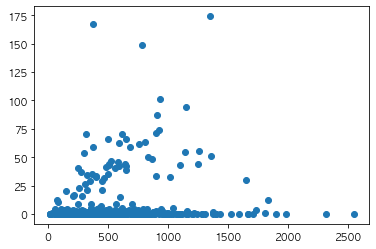

In [9]:
plt.scatter(train["등록차량수"],train["단지내주차면수/연면적"])
plt.show()

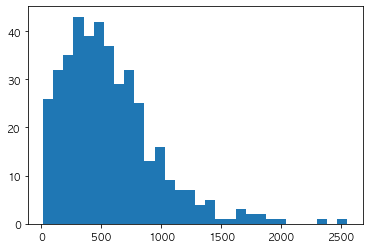

In [10]:
plt.hist(train["등록차량수"],bins = 30)
plt.show()

In [11]:
train["등록차량수"].describe()

count     414.0000
mean      570.1039
std       391.5858
min        13.0000
25%       289.2500
50%       505.0000
75%       760.0000
max     2,550.0000
Name: 등록차량수, dtype: float64

In [12]:
q = list(train["등록차량수"].quantile([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]))
q

[13.0,
 133.6,
 247.20000000000002,
 327.9,
 413.4,
 505.0,
 587.8,
 708.0999999999999,
 824.2,
 1073.1,
 2550.0]

In [13]:
train["등록차량수"]/train["총세대수"]

0     0.8498
1     0.1785
2     0.3287
3     1.2729
4     0.7108
5     0.6025
6     0.8534
7     1.1568
8     1.4074
9     1.4552
10    0.4580
11    0.3340
12    1.7237
13    0.8165
14    0.5733
15    0.6724
16    0.6603
17    1.1272
18    0.3049
19    1.0000
20    0.4786
21    1.3380
22    0.6328
23    0.2741
24    0.8071
25    0.9924
26    0.8397
27    0.7989
28    0.8417
29    0.1599
30    1.3329
31    1.1551
32    1.1310
33    0.9836
34    0.7754
35    0.9841
36    0.9120
37    0.9947
38    0.5030
39    1.0316
40    1.1218
41    1.0665
42    0.9188
43    0.4166
44    0.6259
45    0.9904
46    1.0655
47    1.1448
48    0.1192
49    0.5900
50    0.5386
51    0.4744
52    1.0211
53    1.0130
54    0.5845
55    1.0476
56    0.7333
57    0.8097
58    0.9024
59    1.1462
60    0.7492
61    1.4773
62    0.9587
63    0.5941
64    0.9960
65    1.1645
66    1.0453
67    0.6931
68    0.2056
69    0.8024
70    0.5448
71    0.5962
72    0.7762
73    0.5529
74    0.8859
75    0.7428
76    0.4794

In [14]:
q2 = list(train["단지내주차면수"].quantile([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]))
q2

[13.0,
 188.60000000000002,
 270.0,
 359.79999999999995,
 422.20000000000005,
 517.0,
 615.8,
 731.1999999999998,
 876.4000000000001,
 1064.5,
 1798.0]

In [ ]:
train["y_class"] = [99]*len(train)
for i in range(len(q[:-1])):
    train.loc[(train.등록차량수>=q[i])&(train.등록차량수<q[i+1]),"y_class"] = i
train.loc[train.등록차량수==q[10],"y_class"] = 9

In [19]:
train["y_class2"] = [99]*len(train)
for i in range(len(q2[:-1])):
    train.loc[(train["단지내주차면수"]>=q2[i])&(train["단지내주차면수"]<q2[i+1]),"y_class2"] = i
train.loc[train["단지내주차면수"]==q2[10],"y_class2"] = 9

In [ ]:
train[["등록차량수","y_class2"]]

In [ ]:
train.y_class.value_counts()

In [53]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [54]:
train.columns

Index(['단지코드', '총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수', '연면적', '위도', '경도', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', '지역',
       '자격유형', '공급유형', '전용면적_std', '전용면적별세대수_std', '임대보증금_std', '임대료_std',
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도', '상가',
       '아파트', '공공임대(50년)', '공공임대(분납)', '국민임대', '영구임대', '임대상가', '행복주택',
       '공공임대(5년,10년)', 'A', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', '등록차량수/총세대수', '단지내주차면수/연면적', '임대보증금/임대료', '단지내주차면수/총세대수',
       'y_class2'],
      dtype='object')

In [ ]:
y = train["y_class"]

In [20]:
y = train["y_class2"]

In [59]:
train2 = train.drop(['등록차량수/총세대수',"단지코드",'위도', '경도','상가','C', 'D','등록차량수','지역','자격유형', '공급유형','y_class2', '단지내주차면수/총세대수'],axis=1)
test2 = test[train2.columns]

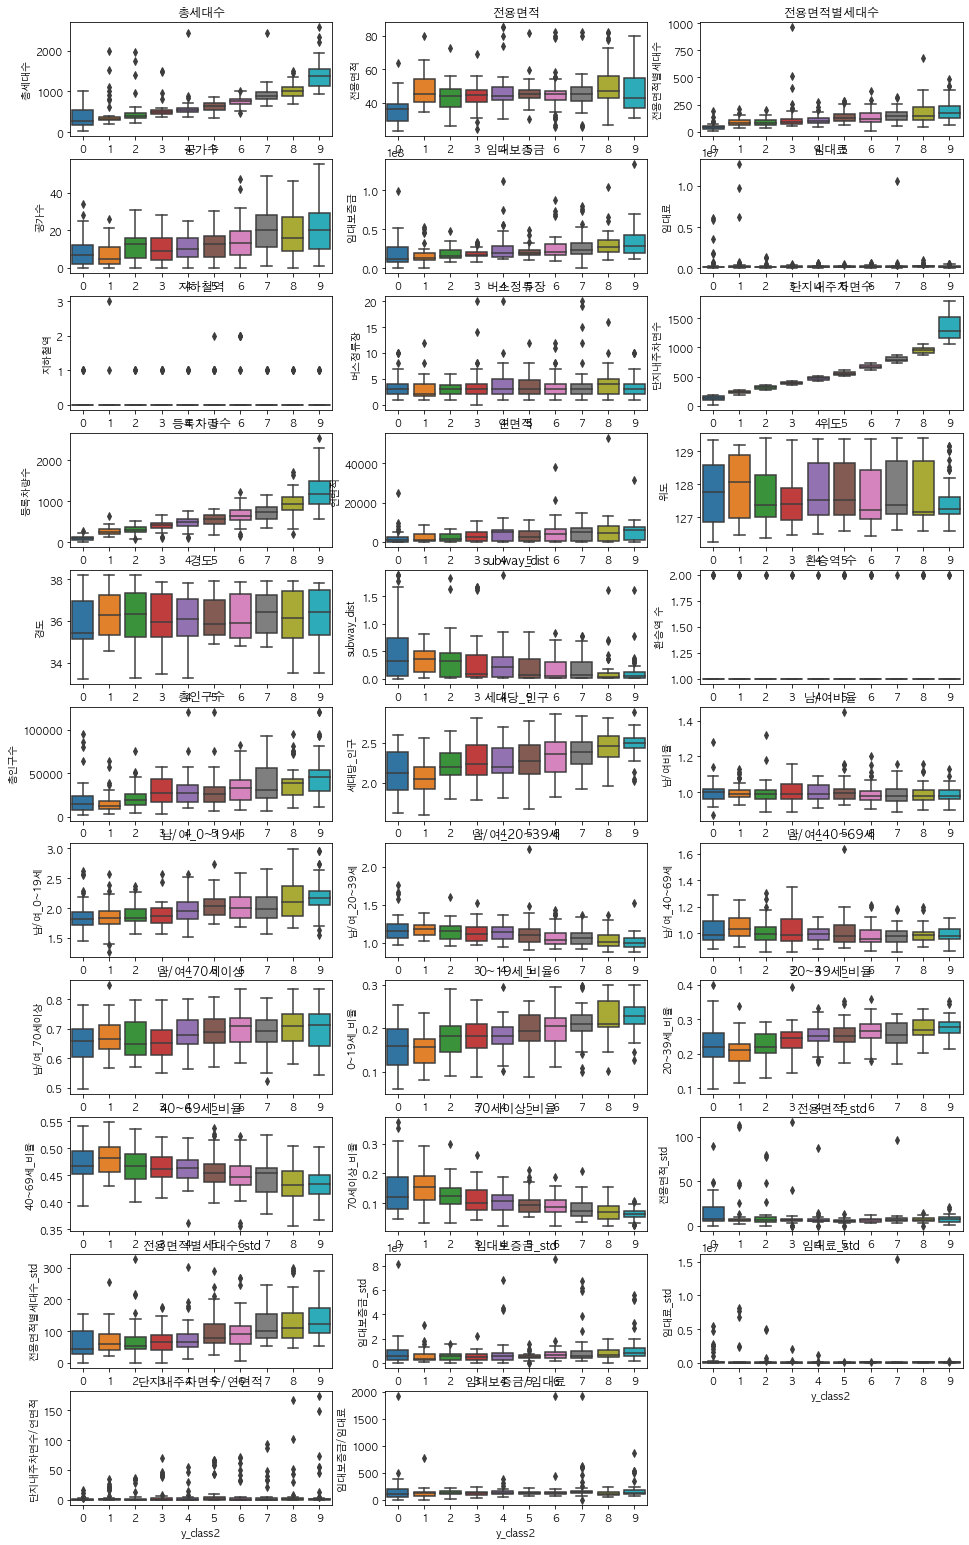

In [21]:
plt.figure(figsize=(16,60))
for i,r in enumerate(['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수', '연면적', '위도', '경도', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', 
       '전용면적_std', '전용면적별세대수_std', '임대보증금_std', '임대료_std',"단지내주차면수/연면적","임대보증금/임대료"]):
    plt.subplot(24,3,i+1)
    sns.boxplot(train.y_class2, train[r])
    plt.title(r)

In [ ]:
q3 = list(train["단지내주차면수"].quantile([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]))
q3

In [ ]:
sns.boxplot(train.y_class2, train[""])

In [74]:
train["temp"] = [99]*len(train)
train.loc[train.y_class2.isin([0,1,2,3,4]),"temp"] = 0
train.loc[-train.y_class2.isin([0,1,2,3,4]) ,"temp"] = 1


In [65]:
train.loc[train.y_class2.isin([0,1])]

단지코드       총세대수    전용면적  전용면적별세대수     공가수           임대보증금  \
1    C1004   521.0000 39.1368   27.4211  3.0000  9,645,112.2951   
14   C1045   464.0000 34.1025  116.0000 13.0000 15,525,000.0000   
18   C1056   410.0000 31.2683   34.1667  0.0000    622,208.3333   
29   C1109 1,957.0000 45.4095   88.9545  1.0000 12,750,732.3823   
38   C1156 1,004.0000 26.5587  124.7500 47.0000 67,596,375.0000   
48   C1206   755.0000 42.7983   40.6667  1.0000 13,015,643.8114   
49   C1207   100.0000 27.8467   33.3333 10.0000 28,073,333.3333   
68   C1316   107.0000 42.7450   53.5000  7.0000 27,043,800.0000   
82   C1363 2,568.0000 33.5529  183.4286 11.0000 25,417,142.8571   
97   C1439 1,755.0000 42.3344   36.5625 29.0000  7,685,094.2906   
104  C1476   453.0000 36.2937   56.6250  6.0000  8,583,000.0000   
108  C1497   802.0000 39.4200  401.0000  7.0000 13,253,500.0000   
116  C1569   631.0000 39.2029   90.1429  8.0000 13,648,142.8571   
119  C1584 1,227.0000 26.7233  203.3333 40.0000 42,306,666.6667   
124  C1616 1,507.0000 69.3382   68.5000  1.0000 18,568,762.8127   
131  C1652   890.0000 32.3025   74.1667 20.0000 74,533,333.3333   
134  C1659   902.0000 30.2731   69.3846 32.0000 26,612,769.2308   
144  C1685   295.0000 32.4778   32.7778 28.0000 32,417,333.3333   
148  C1695   203.0000 26.7820   40.0000 12.0000 22,504,000.0000   
150  C1698   460.0000 35.6475   57.5000  1.0000  9,742,000.0000   
153  C1704   639.0000 38.3176   37.5882 34.0000  4,663,411.7647   
157  C1722   809.0000 38.8545   73.5455  1.0000  8,072,166.7712   
158  C1724 1,256.0000 26.9220  125.6000  1.0000 21,817,100.0000   
167  C1762   462.0000 54.5800  154.0000  4.0000 19,974,333.3333   
170  C1775   711.0000 37.6512   41.8235  5.0000 99,278,289.9059   
172  C1786   480.0000 26.9040   96.0000 25.0000 24,813,200.0000   
174  C1790   657.0000 35.8467   19.9091  2.0000  9,398,319.4953   
176  C1803   100.0000 29.2310   10.0000 13.0000 37,640,000.0000   
185  C1850   388.0000 46.3267  128.3333  0.0000 13,485,333.3333   
186  C1859 2,424.0000 54.0652   60.6000  1.0000 25,434,386.4465   
189  C1866   338.0000 42.2575   84.5000  1.0000 11,249,250.0000   
191  C1871   550.0000 41.4250   91.6667 15.0000 12,972,000.0000   
192  C1874   619.0000 30.8960   20.6333  2.0000  5,920,140.4429   
193  C1875 1,003.0000 35.9436   45.5909  5.0000 10,065,995.2944   
200  C1899   451.0000 31.0150   75.1667  0.0000  2,898,066.6667   
203  C1910   616.0000 27.6420   61.2000 21.0000 20,324,000.0000   
206  C1925   601.0000 37.6917  100.0000  9.0000  7,386,000.0000   
209  C1936   240.0000 51.8925   60.0000  8.0000 32,443,000.0000   
217  C1968   514.0000 32.1500  102.8000  0.0000 12,455,400.0000   
219  C1970   214.0000 26.8860   40.0000 16.0000 25,696,000.0000   
221  C1979   270.0000 29.6667   30.0000 17.0000 42,216,333.3333   
222  C1983   903.0000 40.6200   60.2000  3.0000  6,571,400.0000   
232  C2020    40.0000 26.6167   13.3333  7.0000 28,133,333.3333   
235  C2034 1,486.0000 37.0007   51.2414  2.0000 11,303,294.6726   
238  C2038   785.0000 38.1310   39.2500  7.0000  7,141,259.1317   
244  C2059    26.0000 23.1567    8.6667  1.0000 40,023,000.0000   
260  C2109   495.0000 37.0135   29.1176  2.0000  5,526,764.7059   
262  C2132 2,428.0000 53.4628   51.6596  1.0000    616,361.8999   
264  C2135 1,116.0000 37.1980   55.8000 10.0000 12,782,638.1419   
278  C2190 1,013.0000 26.6819   48.2381  7.0000  8,725,210.5094   
280  C2202   623.0000 43.3367  207.6667  0.0000 10,588,333.3333   
283  C2212   697.0000 48.0186   49.7857  0.0000  7,671,353.1943   
284  C2216   390.0000 39.1950  195.0000  2.0000  9,447,000.0000   
285  C2221   590.0000 49.5350   73.7500  1.0000 15,406,500.0000   
286  C2225 1,206.0000 26.1356  133.3333 49.0000 52,588,777.7778   
290  C2245   212.0000 26.8929   30.0000 22.0000 51,845,428.5714   
294  C2258   965.0000 38.1310   48.2500 13.0000  8,577,814.8684   
300  C2289 1,527.0000 64.2671   63.6250  2.0000  1,199,248.4622   
301  C2298   581.0000 28.7700  115.6000 21.0000 26,54

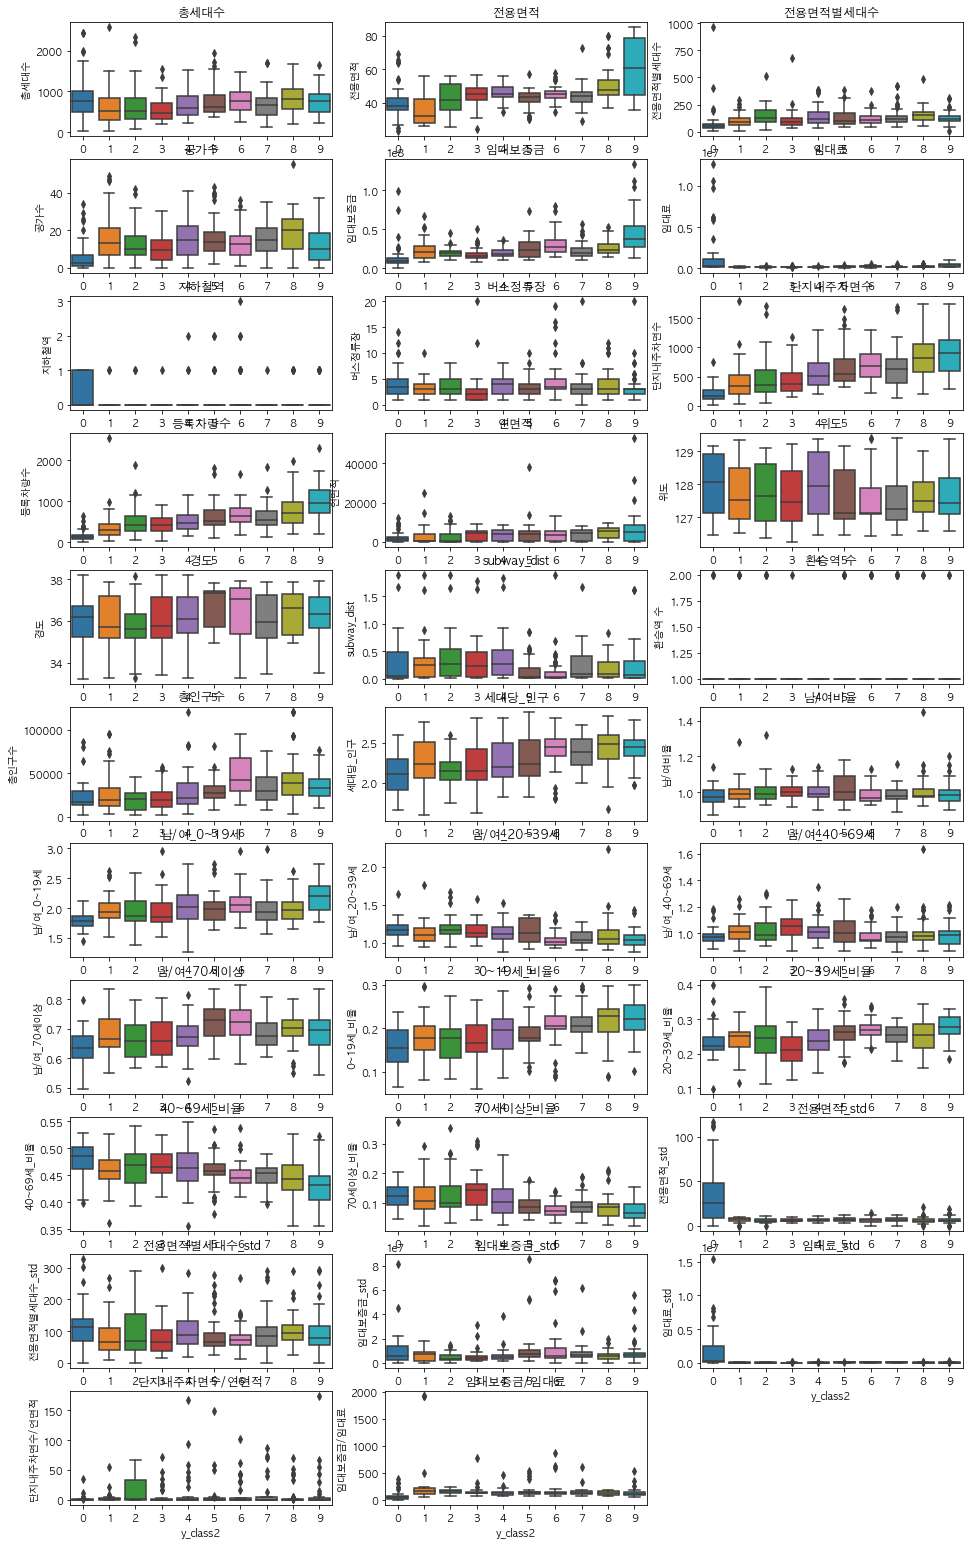

In [61]:
plt.figure(figsize=(16,60))
for i,r in enumerate(['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수', '연면적', '위도', '경도', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', 
       '전용면적_std', '전용면적별세대수_std', '임대보증금_std', '임대료_std',"단지내주차면수/연면적","임대보증금/임대료"]):
    plt.subplot(24,3,i+1)
    sns.boxplot(train.y_class2, train[r])
    plt.title(r)

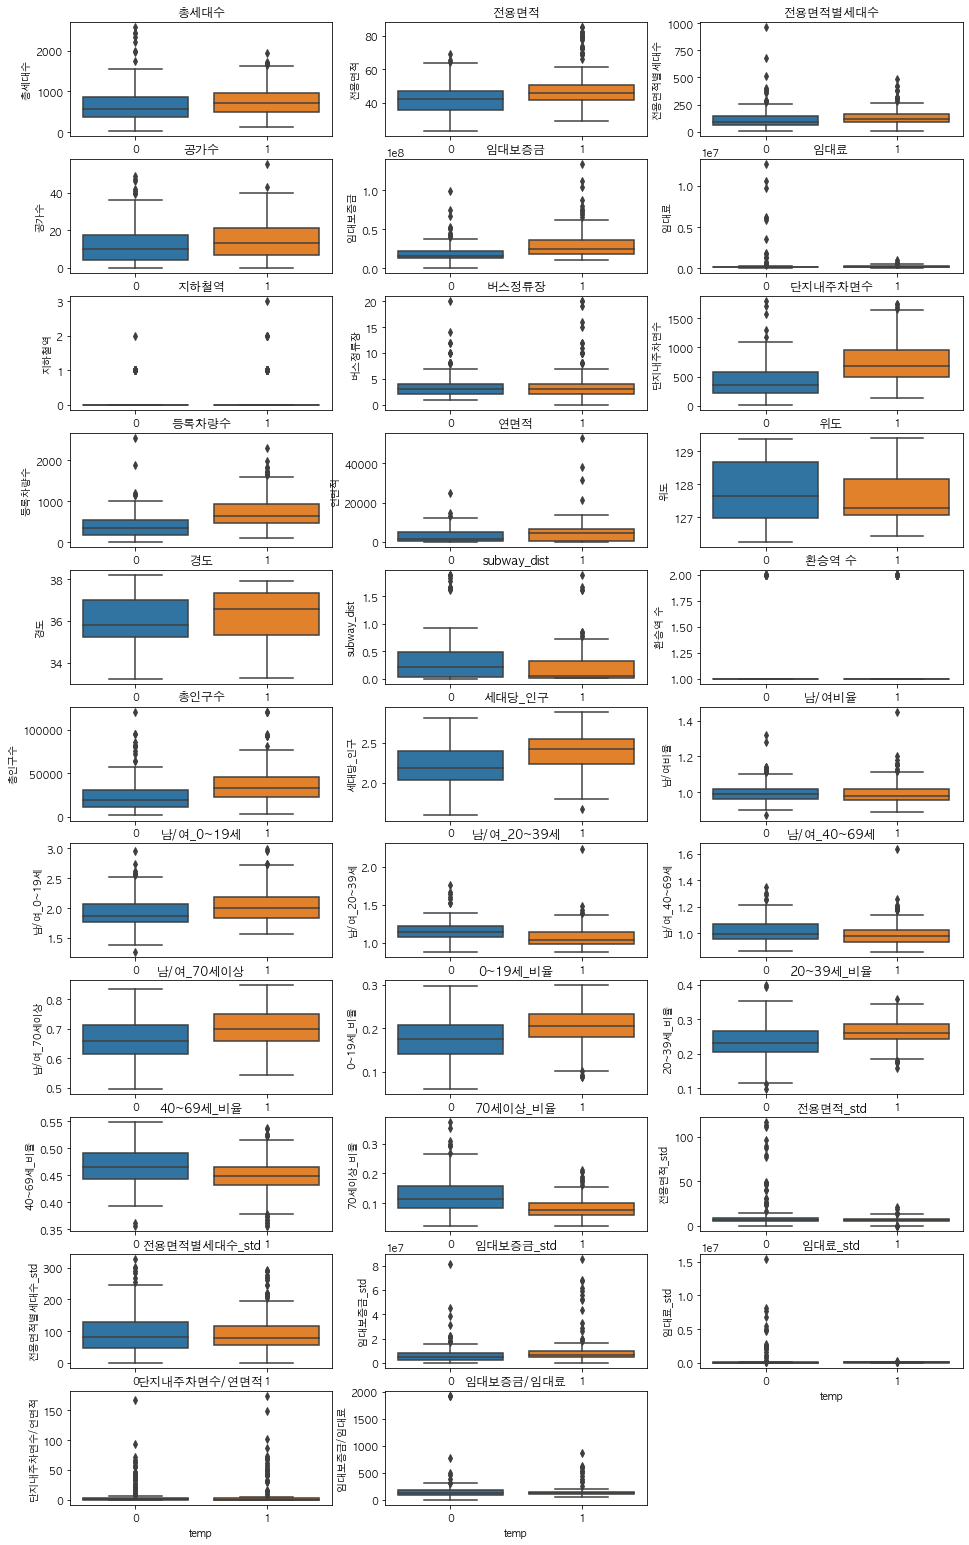

In [75]:
plt.figure(figsize=(16,60))
for i,r in enumerate(['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수', '연면적', '위도', '경도', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', 
       '전용면적_std', '전용면적별세대수_std', '임대보증금_std', '임대료_std',"단지내주차면수/연면적","임대보증금/임대료"]):
    plt.subplot(24,3,i+1)
    sns.boxplot(train.temp, train[r])
    plt.title(r)

In [77]:
train[train.전용면적별세대수>500]

단지코드       총세대수    전용면적  전용면적별세대수     공가수           임대보증금          임대료  \
139  C1672 1,350.0000 55.7550  675.0000 15.0000 18,717,500.0000 229,825.0000   
312  C2340   512.0000 39.8200  512.0000 15.0000 32,454,000.0000 281,700.0000   
364  C2520   970.0000 39.6900  960.0000  2.0000 13,155,000.0000 177,500.0000   

      지하철역  버스정류장    단지내주차면수    등록차량수         연면적       위도      경도  \
139 0.0000 1.0000 1,043.0000 873.0000    520.9840 129.0346 35.2039   
312 0.0000 3.0000   362.0000 382.0000 10,400.1520 126.9185 37.4607   
364 1.0000 2.0000   420.0000 386.0000  7,783.0300 127.3965 36.3081   

     subway_dist  환승역 수        총인구수  세대당_인구  남/여비율  남/여_0~19세  남/여_20~39세  \
139       0.0092 1.0000 20,524.6667  2.4633 0.9567     2.1913      1.0699   
312       0.0253 1.0000 22,324.9091  1.7864 1.0809     1.8072      1.1820   
364       0.0215 1.0000 17,700.5000  2.3300 0.9400     1.8000      1.0292   

     남/여_40~69세  남/여_70세이상  0~19세_비율  20~39세_비율  40~69세_비율  70세이상_비율    지역  \
139      0.9102     0.8013    0.1517     0.2555     0.4891    0.1036  전라북도   
312      1.0644     0.7984    0.0910     0.3924     0.4083    0.1083   강원도   
364      0.9204     0.6853    0.1799     0.2276     0.4632    0.1293  경상남도   

    자격유형       공급유형  전용면적_std  전용면적별세대수_std      임대보증금_std     임대료_std  강원도  \
139    A       국민임대    5.4801      298.3991 1,839,184.7379 23,341.5948    0   
312    A       국민임대    0.0000        0.0000         0.0000      0.0000    0   
364    A  공공임대(10년)    0.0000        0.0000         0.0000      0.0000    0   

     경기도  경상남도  경상북도  광주광역시  대구광역시  대전광역시  부산광역시  세종특별자치시  울산광역시  전라남도  전라북도  \
139    0     0     0      0      0      0      1        0      0     0     0   
312    0     0     0      0      0      0      0        0      0     0     0   
364    0     0     0      0      0      1      0        0      0     0     0   

     제주특별자치도  충청남도  충청북도  상가  아파트  공공임대(50년)  공공임대(분납)  국민임대  영구임대  임대상가  \
139        0     0     0   0    2          0         0     1     0     0   
312        0     0     0   0    1          1         0     0     0     0   
364        0     0     0   0    1          1         0     0     0     0   

     행복주택  공공임대(5년,10년)  A  C  D  E  G  H  I  J  K  L  M  N  등록차량수/총세대수  \
139     0             0  1  0  0  0  0  0  0  0  0  0  0  0      0.6467   
312     0             0  1  0  0  0  0  0  0  0  0  0  0  0      0.7461   
364     0             0  1  0  0  0  0  0  0  0  0  0  0  0      0.3979   

     단지내주차면수/연면적  임대보증금/임대료  단지내주차면수/총세대수  y_class2  temp  \
139       2.0020    81.4424        0.7726         3     0   
312       0.0348   115.2077        0.7070         2     0   
364       0.0540    74.1127        0.4330         0     0   

                       geometry  
139  POINT (129.03456 35.20395)  
312  POINT (126.91853 37.46072)  
364  POINT (127.39650 36.30812)

In [81]:
train[["전용면적별세대수","임대료","임대보증금"]].describe()

전용면적별세대수             임대료            임대보증금
count  414.0000        414.0000         414.0000
mean   128.2754    344,896.9080  24,498,487.1622
std     92.0783  1,074,198.8171  16,098,615.8977
min      6.5000     27,000.0000     616,361.8999
25%     73.7708    125,294.8750  14,919,750.0000
50%    107.2857    168,792.5000  20,014,291.6667
75%    156.1250    236,980.3333  29,592,484.3750
max    960.0000 12,644,264.3083 133,065,428.5714

In [66]:
import pandas as pd
import numpy as np

from shapely.geometry import Point, shape, mapping
from shapely.ops import unary_union

import matplotlib.pyplot as plt

#from geoband.API import *
import folium
import json
import geopandas as gpd
from geopandas import gpd

from folium import plugins
import re

In [70]:
train["temp"] = [99]*len(train)
train.loc[train.y_class2.isin([0,1]),"temp"] = 0
train.loc[-train.y_class2.isin([0,1]) ,"temp"] = 1

In [71]:
# tmp = train[train['지역']=='서울특별시']
tmp2 = train
tmp2['geometry'] = tmp2.apply(lambda row : Point([row['위도'], row['경도']]), axis=1)
apt2 = gpd.GeoDataFrame(tmp2,geometry='geometry')
apt2.crs={'init':'epsg:4326'}
#apt = apt[['단지코드','위도','경도','geometry','지역','등록차량수','등록차량수/총세대수','등록차량수/단지내주차면수']].drop_duplicates().reset_index(drop=True)

In [73]:
apt2[]

단지코드       총세대수    전용면적  전용면적별세대수     공가수            임대보증금  \
0    C1000   566.0000 45.2186   80.8571 10.0000  13,203,571.4286   
1    C1004   521.0000 39.1368   27.4211  3.0000   9,645,112.2951   
2    C1005 1,144.0000 54.3600  381.3333 16.0000  17,107,666.6667   
3    C1013 1,308.0000 46.1420  261.6000 16.0000  24,924,800.0000   
4    C1014   996.0000 49.2329  142.2857  5.0000  23,894,000.0000   
5    C1015   961.0000 46.0475  120.1250 28.0000  15,871,250.0000   
6    C1017 1,460.0000 36.8367  486.6667 27.0000  19,917,000.0000   
7    C1022   389.0000 46.9000   97.2500  4.0000  24,665,000.0000   
8    C1024   680.0000 78.4230   47.7000  2.0000 103,772,700.0000   
9    C1026   290.0000 55.8250  145.0000 10.0000  24,147,500.0000   
10   C1027   452.0000 42.7200   90.4000 21.0000  22,218,800.0000   
11   C1032   946.0000 51.6433  157.6667  6.0000  27,777,166.6667   
12   C1036   742.0000 46.8729  106.0000 13.0000  34,634,571.4286   
13   C1039   790.0000 41.9636   71.8182 13.0000  73,676,272.7273   
14   C1045   464.0000 34.1025  116.0000 13.0000  15,525,000.0000   
15   C1046   232.0000 41.7233   77.3333  9.0000  18,580,333.3333   
16   C1048   368.0000 37.2733  122.6667 15.0000  31,552,333.3333   
17   C1049   676.0000 45.5380  135.2000 18.0000  24,993,200.0000   
18   C1056   410.0000 31.2683   34.1667  0.0000     622,208.3333   
19   C1057   521.0000 47.6450  130.2500 24.0000  19,598,750.0000   
20   C1059   514.0000 43.1383   85.6667  7.0000  16,954,000.0000   
21   C1065   938.0000 35.9200  312.6667 37.0000  13,507,333.3333   
22   C1068   806.0000 43.4917  134.1667 11.0000  16,540,666.6667   
23   C1077   861.0000 45.1600  287.0000 21.0000  18,725,333.3333   
24   C1084   280.0000 48.8067   46.6667  2.0000  17,393,333.3333   
25   C1085   525.0000 41.4250  131.2500  4.0000  15,776,000.0000   
26   C1089   368.0000 45.0367   61.3333 14.0000  13,426,000.0000   
27   C1102   522.0000 45.1633   87.0000 21.0000  17,754,666.6667   
28   C1103   935.0000 41.2150  233.7500 31.0000  15,591,000.0000   
29   C1109 1,957.0000 45.4095   88.9545  1.0000  12,750,732.3823   
30   C1122   808.0000 43.7871  115.4286  7.0000  21,417,857.1429   
31   C1129 1,444.0000 57.8113  180.5000  2.0000  51,269,250.0000   
32   C1131   901.0000 55.6800  225.2500 10.0000  20,601,750.0000   
33   C1133   856.0000 42.0583  142.6667 10.0000  22,916,500.0000   
34   C1136   984.0000 40.4425  246.0000 31.0000  73,838,750.0000   
35   C1141   630.0000 46.9117  105.0000 28.0000  15,384,833.3333   
36   C1143   693.0000 39.6267  231.0000  3.0000  16,944,333.3333   
37   C1155   375.0000 54.3033  125.0000  9.0000  36,751,000.0000   
38   C1156 1,004.0000 26.5587  124.7500 47.0000  67,596,375.0000   
39   C1163   316.0000 37.7900  105.3333 20.0000  12,762,333.3333   
40   C1171   624.0000 44.7083   52.0000 13.0000  32,014,083.3333   
41   C1173   571.0000 45.8278   63.4444  7.0000  19,141,888.8889   
42   C1175   468.0000 52.9033  156.0000 15.0000  27,325,666.6667   
43   C1176 1,486.0000 37.2600  185.7500 55.0000  18,480,750.0000   
44   C1177 1,668.0000 42.2775  104.2500 17.0000  29,420,687.5000   
45   C1180   314.0000 54.5800  104.6667 15.0000  17,588,333.3333   
46   C1184   458.0000 45.5343   65.4286  4.0000  33,181,428.5714   
47   C1194   511.0000 53.3800  102.2000  3.0000  19,473,800.0000   
48   C1206   755.0000 42.7983   40.6667  1.0000  13,015,643.8114   
49   C1207   100.0000 27.8467   33.3333 10.0000  28,073,333.3333   
50   C1210 1,088.0000 25.6080  217.6000 39.0000  23,832,000.0000   
51   C1213   312.0000 41.4767   52.0000  8.0000  15,847,500.0000   
52   C1227   806.0000 41.9611   89.5556  7.0000  24,699,000.0000   
53   C1234   307.0000 55.7150  153.5000  1.0000  23,830,000.0000   
54   C1236 1,124.0000 46.0258   93.6667 29.0000  21,429,000.0000   
55   C1244 1,722.0000 45.7808  132.4615 10.0000  40,900,461.5385   
56   C1258   840.0000 31.3133  140.0000  0.0000  13,828,000.0000   
57   C1263   268.0000 35.7720   53.6000  4.0000   8,408,400.00

In [ ]:
#gdf = censor_gpd.to_crs(epsg='4326')
# converted_json = tmp2.to_json()
converted_json2 = apt2.to_json()

m = folium.Map(
    location=[37.54238169591348,126.99068745821812],
 attr = '서울',
    zoom_start=12
)

# color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(apt))]
# for n in range(len(apt1)):
#   folium.CircleMarker([apt1['경도'][n],apt1['위도'][n]],
#                       radius=10,
#                       color=color[n],
#                       filcolor=color[n],
#                       fill=True).add_to(m)

for i in range(len(apt2)):
    folium.Circle(
    location = [apt2.경도[i],apt2.위도[i]],
    radius =1000,
    color = "red").add_to(m)
    
# choropleth = folium.Choropleth(
#     geo_data=converted_json,
#     data=apt,
#     columns=['단지코드', '등록차량수'],
#     key_on='feature.properties.name',
#     fill_color='YlGnBu', 
#     fill_opacity=1, 
#     line_opacity=1,
#     highlight=True).add_to(m)

folium.plugins.Fullscreen(position='topright',  
                   title='FULL SCREEN ON', 
                   title_cancel='FULL SCREEN OFF',
                   force_separate_button=True
                  ).add_to(m)

#folium.GeoJson(
 #   converted_json
#).add_to(m)
m

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train2)

X_tr = scaler.transform(train2)
X_tst = scaler.transform(test2)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X_tr, y)
ac_tr = []
ac_tst = []
StratifiedKFold(n_splits = 5,random_state = 42)
for train_index, test_index in skf.split(X_tr, y):
    X_train, X_test = X_tr[train_index], X_tr[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train, y_train)
    print(confusion_matrix(y_train,clf.predict(X_train)))
    print(confusion_matrix(y_test,clf.predict(X_test)))
    ac_tr.append(accuracy_score(y_train,clf.predict(X_train)))
    ac_tst.append(accuracy_score(y_test,clf.predict(X_test)))

In [ ]:
print(ac_tr)
print(ac_tst)

In [ ]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X_tr, y)
ac_tr = []
ac_tst = []
StratifiedKFold(n_splits = 5,random_state = 42)
for train_index, test_index in skf.split(X_tr, y):
    X_train, X_test = X_tr[train_index], X_tr[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = QuadraticDiscriminantAnalysis()
    clf.fit(X_train, y_train)
    print(confusion_matrix(y_train,clf.predict(X_train)))
    print(confusion_matrix(y_test,clf.predict(X_test)))
    ac_tr.append(accuracy_score(y_train,clf.predict(X_train)))
    ac_tst.append(accuracy_score(y_test,clf.predict(X_test)))

In [ ]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_tr, y)

In [ ]:
confusion_matrix(y,clf.predict(X_tr))

In [ ]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X_tr, y)
ac_tr = []
ac_tst = []
StratifiedKFold(n_splits = 5,random_state = 42)
for train_index, test_index in skf.split(X_tr, y):
    X_train, X_test = X_tr[train_index], X_tr[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train, y_train)
    print(confusion_matrix(y_train,clf.predict(X_train)))
    print(confusion_matrix(y_test,clf.predict(X_test)))
    ac_tr.append(accuracy_score(y_train,clf.predict(X_train)))
    ac_tst.append(accuracy_score(y_test,clf.predict(X_test)))